# Tugas 1 Data Mining - EDA
---
List Anggota Kelompok 9
*   Cahaya Aulia Firdausyah (2006304)
*   Anderfa Jalu Kawani (2102671)
*   Sabila Rosad (2106000)




## Pendahuluan
Indonesia memiliki potensi pariwisata yang luar biasa dengan keberagaman budaya, kekayaan alam, dan daya tarik wisata yang tersebar di berbagai wilayah, terutama di Jawa Barat. Meningkatnya jumlah wisatawan setiap tahun menciptakan peluang ekonomi yang besar, terutama dalam sektor perhotelan, kuliner, dan pendapatan asli daerah (PAD) yang berasal dari pariwisata. Untuk memahami bagaimana faktor-faktor ini saling mempengaruhi serta mengidentifikasi tren dan ketimpangan yang terjadi antarwilayah, analisis data pariwisata menjadi sangat penting.

## Pertanyaan
1. Bagaimana distribusi jumlah hotel dan pengunjung wisata antarwilayah di Jawa Barat?

2. Apa tren utama jumlah pengunjung kawasan wisata dari tahun ke tahun?

3. Bagaimana hubungan antara jumlah hotel dengan pendapatan pariwisata di berbagai kabupaten/kota?

4. Wilayah mana yang menunjukkan efisiensi dalam pendapatan pariwisata dengan fasilitas yang terbatas?

5. Bagaimana ketimpangan pendapatan antarwilayah dalam sektor pariwisata?

6. Bagaimana dampak peristiwa global (misalnya, pandemi COVID-19) terhadap jumlah pengunjung dan pendapatan?

7. Apakah terdapat rekomendasi untuk peningkatan fasilitas atau strategi wisata di wilayah tertentu?


## Import Library

Import library yang akan digunakan

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive



## Load Dataset

Sambungkan GDrive lalu import dan load dataset  yang akan digunakan dari GDrive

In [ ]:
drive.mount('/content/drive')

df_jml_hotel = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_15356_jml_hotel_bintang_non_bintang__jenis_hotel_kabupat_v1_data.xlsx")
df_jml_pengunjung_pariwisata = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_15361_jml_pengunjung_kawasan_pariwisata__jenis_wisatawan_data.xlsx")
df_jml_pariwisata = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_15362_jml_kawasan_pariwisata__kabupatenkota_v1_data.xlsx")
df_jml_pendapatan = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_15380_jml_pendapatan_asli_drh_bidang_pariwisata__sektor_wisa_data.xlsx")
df_jml_potensi_odtw = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_15387_jml_ptns_obyek_daya_tarik_wisata_odtw__jenis_kabup_v2_data.xlsx")
df_jml_rumah_makan = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_15393_jumlah_rumah_makan_berdasarkan_kabupatenkota_v1_data.xlsx")
df_jml_pengunjung_perkemahan = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_16111_jml_pengunjung_perkemahan__jenis_wisatawan_kabupat_v2_data.xlsx")
df_jml_pengunjung_homestay = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_17834_jml_pengunjung_homestay__jenis_wisatawan_kabupaten_v2_data.xlsx")
df_jml_tk_pariwisata = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_jml_tk_kawasan_pariwisata__jk_data.xlsx")
df_luas_pariwisata = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_kawasan_pariwisata_berdasarkan_luas_data.xlsx")
df_jml_kawasan_pariwisata = pd.read_excel("/content/drive/MyDrive/Data Mining/Tugas 1/disparbud-od_15362_jml_kawasan_pariwisata__kabupatenkota_v1_data.xlsx")

Mounted at /content/drive


## Drop Atribut

Melakukan Drop (hapus) pada atribut yang tidak digunakan, seperti:
*   id
*   kode_provinsi
*   nama_provinsi
*   satuan



In [ ]:
df_jml_hotel = df_jml_hotel.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_pengunjung_pariwisata = df_jml_pengunjung_pariwisata.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_pariwisata = df_jml_pariwisata.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_pendapatan = df_jml_pendapatan.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_potensi_odtw = df_jml_potensi_odtw.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_rumah_makan = df_jml_rumah_makan.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_pengunjung_perkemahan = df_jml_pengunjung_perkemahan.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_pengunjung_homestay = df_jml_pengunjung_homestay.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_tk_pariwisata = df_jml_tk_pariwisata.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_luas_pariwisata = df_luas_pariwisata.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])
df_jml_kawasan_pariwisata = df_jml_kawasan_pariwisata.drop(columns=["id", "kode_provinsi", "nama_provinsi", "satuan"])


## Memfilter tiap dataset
Melakukan filterasi agar interval tiap data set sama dari tahun 2018 sampai 2023.

In [ ]:
con1 = (df_jml_hotel['tahun'] >= 2018) & (df_jml_hotel['tahun'] <= 2023)
df_jml_hotel = df_jml_hotel[con1].reset_index(drop=True)
df_jml_hotel.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_pengunjung_pariwisata['tahun'] >= 2018) & (df_jml_pengunjung_pariwisata['tahun'] <= 2023)
df_jml_pengunjung = df_jml_pengunjung_pariwisata[con1].reset_index(drop=True)
df_jml_pengunjung.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_pariwisata['tahun'] >= 2018) & (df_jml_pariwisata['tahun'] <= 2023)
df_jml_pariwisata = df_jml_pariwisata[con1].reset_index(drop=True)
df_jml_pariwisata.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_pendapatan['tahun'] >= 2018) & (df_jml_pendapatan['tahun'] <= 2023)
df_jml_pendapatan = df_jml_pendapatan[con1].reset_index(drop=True)
df_jml_pendapatan.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_potensi_odtw['tahun'] >= 2018) & (df_jml_potensi_odtw['tahun'] <= 2023)
df_jml_potensi_odtw = df_jml_potensi_odtw[con1].reset_index(drop=True)
df_jml_potensi_odtw.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_rumah_makan['tahun'] >= 2018) & (df_jml_rumah_makan['tahun'] <= 2023)
df_jml_rumah_makan = df_jml_rumah_makan[con1].reset_index(drop=True)
df_jml_rumah_makan.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_pengunjung_perkemahan['tahun'] >= 2018) & (df_jml_pengunjung_perkemahan['tahun'] <= 2023)
df_jml_pengunjung_perkemahan = df_jml_pengunjung_perkemahan[con1].reset_index(drop=True)
df_jml_pengunjung_perkemahan.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_pengunjung_homestay['tahun'] >= 2018) & (df_jml_pengunjung_homestay['tahun'] <= 2023)
df_jml_pengunjung_homestay = df_jml_pengunjung_homestay[con1].reset_index(drop=True)
df_jml_pengunjung_homestay.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_tk_pariwisata['tahun'] >= 2018) & (df_jml_tk_pariwisata['tahun'] <= 2023)
df_jml_tk_pariwisata = df_jml_tk_pariwisata[con1].reset_index(drop=True)
df_jml_tk_pariwisata.to_csv('filtered_data.csv', index=False)

con1 = (df_jml_kawasan_pariwisata['tahun'] >= 2018) & (df_jml_kawasan_pariwisata['tahun'] <= 2023)
df_jml_kawasan_pariwisata = df_jml_kawasan_pariwisata[con1].reset_index(drop=True)
df_jml_kawasan_pariwisata.to_csv('filtered_data.csv', index=False)

## Mengganti nama atribut

Mengganti nama atribut agar tidak memiliki kesamaan nama saat melakukan penggabungan (merge)

In [ ]:
df_jml_pengunjung_perkemahan.rename(columns={"jumlah_pengunjung": "jumlah_pengunjung_perkemahan"}, inplace=True)
df_jml_pengunjung_homestay.rename(columns={"jumlah_pengunjung": "jumlah_pengunjung_homestay"}, inplace=True)
df_jml_pengunjung_pariwisata.rename(columns={"jumlah_pengunjung": "jumlah_pengunjung_pariwisata"}, inplace=True)
df_jml_pariwisata.rename(columns={"jumlah_kawasan": "jumlah_kawasan_pariwisata"}, inplace=True)
df_jml_potensi_odtw.rename(columns={"jumlah_odtw": "jumlah_potensi_odtw"}, inplace=True)
df_jml_tk_pariwisata.rename(columns={"jumlah_tenaga_kerja": "jumlah_tk_pariwisata"}, inplace=True)

## Data Exploration

Mengeksplorasi setiap dataset yang digunakan

**Mengeksplorasi dataset jumlah hotel**

In [ ]:
df_jml_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  945 non-null    int64 
 1   nama_kabupaten_kota  945 non-null    object
 2   jenis_hotel          945 non-null    object
 3   jumlah_hotel         945 non-null    int64 
 4   tahun                945 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 37.0+ KB


**Mengekplorasi dataset jumlah pengunjung pariwisata**

In [ ]:
df_jml_pengunjung_pariwisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   kode_kabupaten_kota           484 non-null    int64  
 1   nama_kabupaten_kota           484 non-null    object 
 2   jenis_wisatawan               484 non-null    object 
 3   jumlah_pengunjung_pariwisata  483 non-null    float64
 4   tahun                         484 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 19.0+ KB


**Mengekplorasi dataset jumlah pariwisata**

In [ ]:
df_jml_pariwisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   kode_kabupaten_kota        162 non-null    int64  
 1   nama_kabupaten_kota        162 non-null    object 
 2   jumlah_kawasan_pariwisata  157 non-null    float64
 3   tahun                      162 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


**Mengekplorasi dataset jumlah pendapatan asli daerah bidang pariwisata**

In [ ]:
df_jml_pendapatan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  541 non-null    int64 
 1   nama_kabupaten_kota  541 non-null    object
 2   sektor_wisata        541 non-null    object
 3   jumlah_pendapatan    541 non-null    int64 
 4   tahun                541 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.3+ KB


**Mengekplorasi dataset jumlah potensi Obyek Daya Tarik Wisata (ODTW) dan jenisnya**

In [ ]:
df_jml_potensi_odtw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kode_kabupaten_kota  486 non-null    int64 
 1   nama_kabupaten_kota  486 non-null    object
 2   jenis_odtw           486 non-null    object
 3   jumlah_potensi_odtw  486 non-null    int64 
 4   tahun                486 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 19.1+ KB


**Mengekplorasi dataset jumlah rumah makan**

In [ ]:
df_jml_rumah_makan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  162 non-null    int64  
 1   nama_kabupaten_kota  162 non-null    object 
 2   jumlah_rumah_makan   162 non-null    float64
 3   tahun                162 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


**Mengekplorasi dataset jumlah pengunjung perkemahan**

In [ ]:
df_jml_pengunjung_perkemahan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   kode_kabupaten_kota           324 non-null    int64 
 1   nama_kabupaten_kota           324 non-null    object
 2   jenis_wisatawan               324 non-null    object
 3   jumlah_pengunjung_perkemahan  324 non-null    int64 
 4   tahun                         324 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.8+ KB


**Mengekplorasi dataset jumlah pengunjung homestay**

In [ ]:
df_jml_pengunjung_homestay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kode_kabupaten_kota         324 non-null    int64 
 1   nama_kabupaten_kota         324 non-null    object
 2   jenis_wisatawan             324 non-null    object
 3   jumlah_pengunjung_homestay  324 non-null    int64 
 4   tahun                       324 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.8+ KB


**Mengekplorasi dataset jumlah tenaga kerja pariwisata**

In [ ]:
df_jml_tk_pariwisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   kode_kabupaten_kota   0 non-null      int64 
 1   nama_kabupaten_kota   0 non-null      object
 2   jenis_kelamin         0 non-null      object
 3   jumlah_tk_pariwisata  0 non-null      int64 
 4   tahun                 0 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 124.0+ bytes


**Mengekplorasi dataset luas kawasan pariwisata**

In [ ]:
df_luas_pariwisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  107 non-null    int64  
 1   nama_kabupaten_kota  107 non-null    object 
 2   luas_kawasan         107 non-null    float64
 3   tahun                107 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


**Mengekplorasi dataset jumlah kawasan pariwisata**

In [ ]:
df_jml_kawasan_pariwisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  162 non-null    int64  
 1   nama_kabupaten_kota  162 non-null    object 
 2   jumlah_kawasan       157 non-null    float64
 3   tahun                162 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


## Menggabungkan dataset

Menggabungkan setiap dataset yang digunakan

In [ ]:
df_merged = pd.merge(df_jml_hotel, df_jml_pengunjung_pariwisata, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_pariwisata, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_pendapatan, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_potensi_odtw, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_rumah_makan, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_pengunjung_perkemahan, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_pengunjung_homestay, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_tk_pariwisata, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_luas_pariwisata, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')
df_merged = pd.merge(df_merged, df_jml_kawasan_pariwisata, on=['kode_kabupaten_kota', 'nama_kabupaten_kota', 'tahun'], how='outer')


df_merged = df_merged.loc[:, [
    'kode_kabupaten_kota',
    'nama_kabupaten_kota',
    'tahun',
    'jumlah_hotel',
    'jumlah_pengunjung_pariwisata',
    'jumlah_pendapatan',
    'jumlah_rumah_makan',
    'jumlah_pengunjung_perkemahan',
    'jumlah_pengunjung_homestay',
    'jumlah_kawasan_pariwisata',
    'jumlah_potensi_odtw',
    'jenis_odtw',
    'jumlah_tk_pariwisata',
]]

df_merged.head(10)

,kode_kabupaten_kota,nama_kabupaten_kota,tahun,jumlah_hotel,jumlah_pengunjung_pariwisata,jumlah_pendapatan,jumlah_rumah_makan,jumlah_pengunjung_perkemahan,jumlah_pengunjung_homestay,jumlah_kawasan_pariwisata,jumlah_potensi_odtw,jenis_odtw,jumlah_tk_pariwisata
0,3201,KABUPATEN BOGOR,2014,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3201,KABUPATEN BOGOR,2014,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3201,KABUPATEN BOGOR,2015,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3201,KABUPATEN BOGOR,2015,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3201,KABUPATEN BOGOR,2016,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3201,KABUPATEN BOGOR,2016,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3201,KABUPATEN BOGOR,2017,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3201,KABUPATEN BOGOR,2017,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3201,KABUPATEN BOGOR,2018,0.0,4411967.0,0.0,0.0,0.0,0.0,86.0,55.0,ALAM,NaN
9,3201,KABUPATEN BOGOR,2018,0.0,4411967.0,0.0,0.0,0.0,0.0,86.0,55.0,ALAM,NaN


## Cek value null

Memeriksa apakah terdapat data yang kosong atau tidak

In [ ]:
df_merged.isnull().sum()


,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
tahun,0
jumlah_hotel,215
jumlah_pengunjung_pariwisata,1909
jumlah_pendapatan,1834
jumlah_rumah_makan,215
jumlah_pengunjung_perkemahan,215
jumlah_pengunjung_homestay,215
jumlah_kawasan_pariwisata,3095


## Visualisasi

## Bar chart

untuk memvisualisasi banyaknya hotel dengan jumlah pengunjung pariwisata

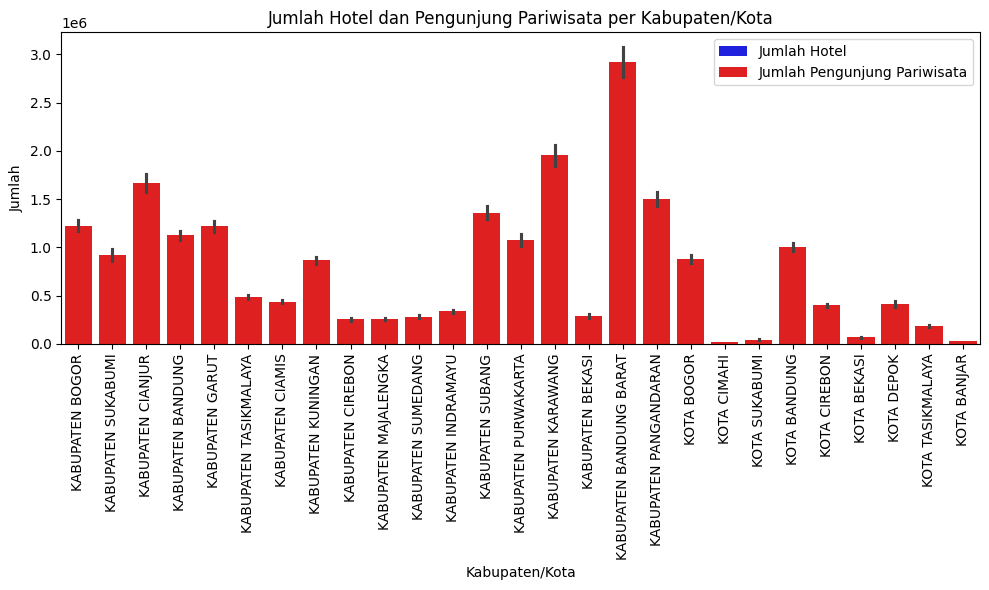

In [ ]:
# Set ukuran plot
plt.figure(figsize=(10, 6))

# Buat bar plot jumlah hotel vs jumlah pengunjung pariwisata
sns.barplot(x='nama_kabupaten_kota', y='jumlah_hotel', data=df_merged, color='blue', label='Jumlah Hotel')
sns.barplot(x='nama_kabupaten_kota', y='jumlah_pengunjung_pariwisata', data=df_merged, color='red', label='Jumlah Pengunjung Pariwisata')

# Rotasi label kabupaten/kota untuk memudahkan dalam membaca
plt.xticks(rotation=90)

# Tambahkan judul dan label
plt.title('Jumlah Hotel dan Pengunjung Pariwisata per Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah')

# Tampilkan legend
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

## Analisis Bar Chart Jumlah hotel dengan Jumlah Pengunjung Pariwisata
1. Kabupaten Bandung Barat menunjukkan jumlah pengunjung wisata terbesar dibandingkan daerah lain, yang ditunjukkan oleh batang merah yang sangat tinggi. Batang biru tidak terlalu terlihat, menunjukkan jumlah hotel yang jauh lebih sedikit dibandingkan jumlah pengunjung.

2. Daerah lain yang juga menunjukkan jumlah pengunjung yang relatif tinggi meliputi:
  - Kabupaten Karawang
  - Kabupaten Purwakarta
  - Kabupaten Bogor Daerah-daerah ini juga memiliki batang merah yang lebih tinggi, meskipun tidak melebihi Bandung Barat.

3. Kota-kota kecil, seperti Kota Banjar, Kota Sukabumi, dan Kota Bekasi, menunjukkan jumlah pengunjung wisata yang relatif rendah, seperti yang ditunjukkan oleh batang merah yang lebih kecil.

4. Perbedaan dalam Jumlah Hotel:

  - Batang biru, meskipun jauh lebih kecil, menunjukkan bahwa sebagian besar daerah memiliki jumlah hotel yang rendah hingga sedang dibandingkan dengan jumlah pengunjung.
  - Kabupaten Bandung Barat tampaknya memiliki ketidakseimbangan antara jumlah pengunjung dan hotel yang tersedia.

## Line Chart

Memvisualisasikan Jumlah Pengunjung Pariwisata per Kota/Kabupaten untuk Setiap Tahun

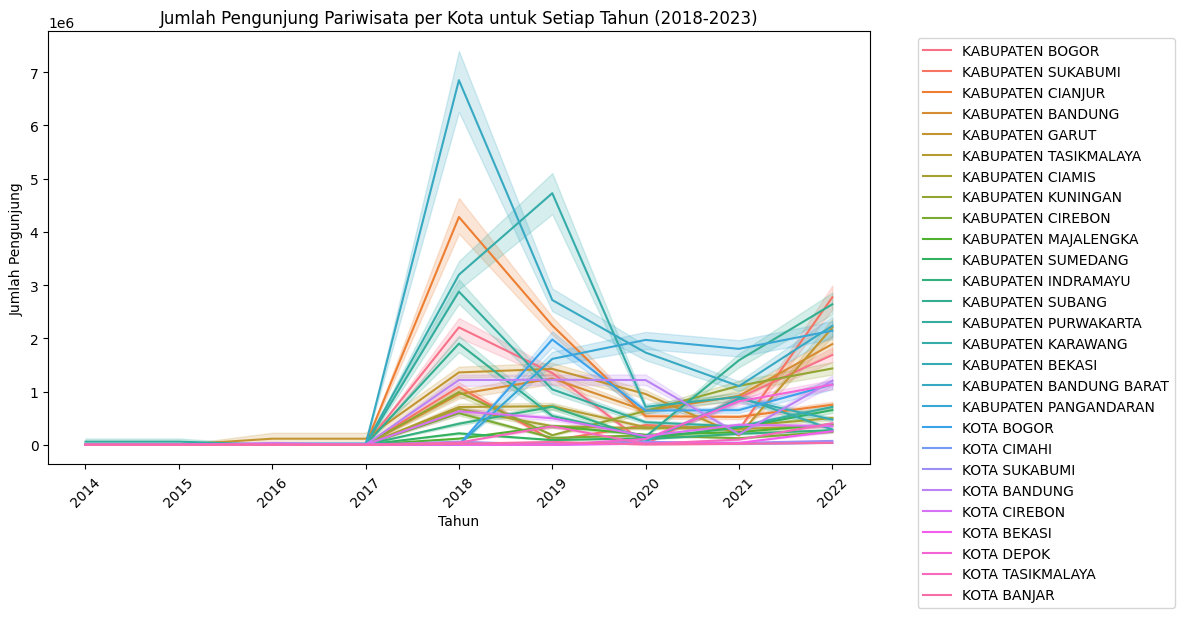

In [ ]:
# Mengatur ukuran plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='tahun', y='jumlah_pengunjung_pariwisata', hue='nama_kabupaten_kota', data=df_merged)
plt.title('Jumlah Pengunjung Pariwisata per Kota untuk Setiap Tahun (2018-2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengunjung')

# Rotasi label tahun agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menempatkan legenda di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analisis

1. Puncak yang Signifikan pada Tahun 2018:

  - Hampir semua garis menunjukkan peningkatan yang tajam di sekitar tahun 2018, dengan beberapa kabupaten/kota mencapai jumlah pengunjung yang sangat tinggi.
  - Kabupaten Bandung Barat dan Kabupaten Karawang menunjukkan puncak pengunjung tertinggi, masing-masing mendekati atau bahkan melampaui 7 juta pengunjung di tahun tersebut.
  - Beberapa wilayah lain seperti Kabupaten Purwakarta dan Kabupaten Bogor juga menunjukkan peningkatan pengunjung yang signifikan pada tahun yang sama, meskipun tidak setinggi Bandung Barat.

2. Penurunan Setelah Tahun 2018:

  - Setelah 2018, terjadi penurunan tajam di hampir semua kabupaten/kota, kemungkinan terkait dengan dampak pandemi COVID-19 pada industri pariwisata global. Tahun 2019 hingga 2020 menandai penurunan besar dalam jumlah pengunjung di hampir semua daerah.
  - Pada tahun 2021 dan 2022, terlihat sedikit pemulihan di beberapa kabupaten/kota, meskipun belum mencapai angka pengunjung pada tahun 2018.

3. Stabilitas di Daerah Lain:

  - Ada beberapa daerah yang menunjukkan stabilitas jumlah pengunjung, dengan hanya sedikit perubahan dari tahun ke tahun. Kota kecil seperti Kota Banjar dan Kota Sukabumi tidak menunjukkan perubahan drastis dalam jumlah pengunjung selama periode yang ditampilkan.

## Scatter Plot

Visualisasi ini menunjukkan hubungan antara jumlah hotel dan jumlah pendapatan di setiap kota/kabupaten.

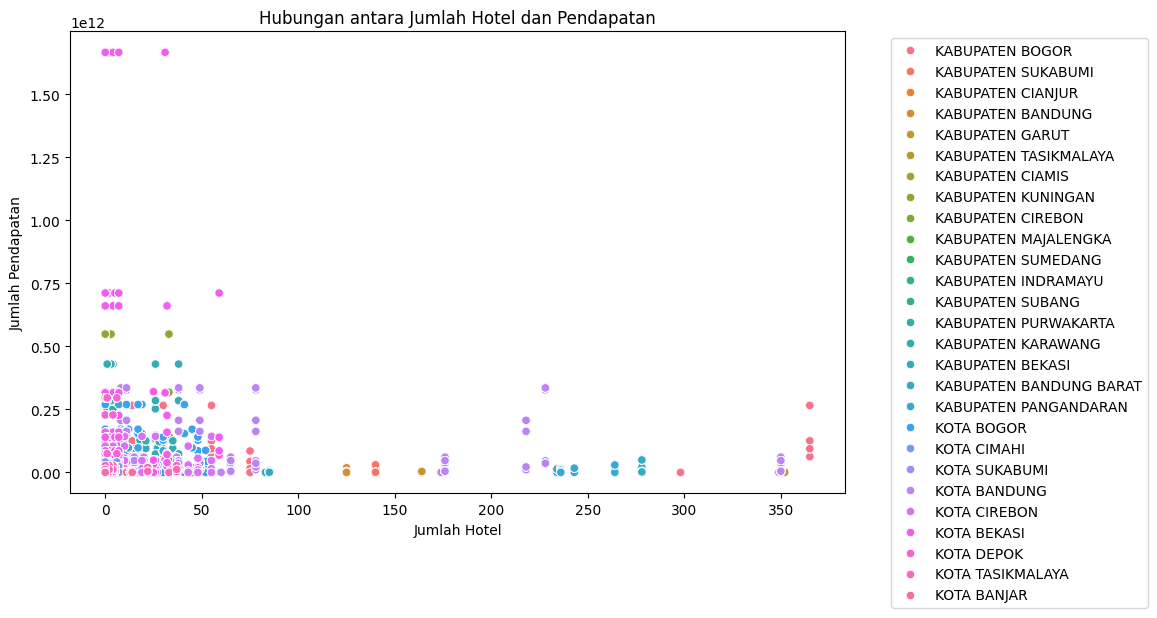

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='jumlah_hotel', y='jumlah_pendapatan', data=df_merged, hue='nama_kabupaten_kota')
plt.title('Hubungan antara Jumlah Hotel dan Pendapatan')
plt.xlabel('Jumlah Hotel')
plt.ylabel('Jumlah Pendapatan')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Analisis

1. Konsentrasi Data di Jumlah Hotel Rendah:

  - Sebagian besar titik terdistribusi pada kisaran jumlah hotel yang lebih rendah, yakni antara 0 hingga 100 hotel.
  - Ini menunjukkan bahwa mayoritas Kabupaten/Kota memiliki jumlah hotel yang relatif sedikit, namun masih menunjukkan variasi dalam pendapatan.
2. Kabupaten dengan Pendapatan Tinggi:

  - Ada beberapa titik yang menonjol dengan pendapatan di atas 1 triliun, meskipun jumlah hotel relatif sedikit. Contohnya, Kabupaten Bandung dan Kabupaten Garut tampaknya menghasilkan pendapatan yang tinggi meskipun jumlah hotelnya tidak banyak.
  - Kota Bandung tampaknya memiliki distribusi hotel yang lebih tinggi dan pendapatan yang cukup besar, meskipun tidak setinggi beberapa kabupaten lainnya.

3. Daerah dengan Hotel Lebih Banyak:

  - Ada sedikit daerah yang memiliki lebih dari 200 hotel, seperti Kabupaten Pangandaran, Kota Bandung, dan Kabupaten Bogor, namun pendapatan mereka relatif bervariasi. Ini menunjukkan bahwa peningkatan jumlah hotel belum tentu meningkatkan pendapatan secara proporsional.

4. Cluster Data yang Menarik:

  - Banyak titik yang terkonsentrasi pada bagian bawah grafik dengan jumlah hotel kurang dari 50, namun dengan pendapatan yang cukup tinggi, menunjukkan efisiensi dalam memaksimalkan pendapatan dengan jumlah hotel yang sedikit.

## Line Chart
Visualisasi tren jumlah pendapatan asli daerah (PAD) dari sektor pariwisata di setiap kota/kabupaten dari tahun 2018 hingga 2023.

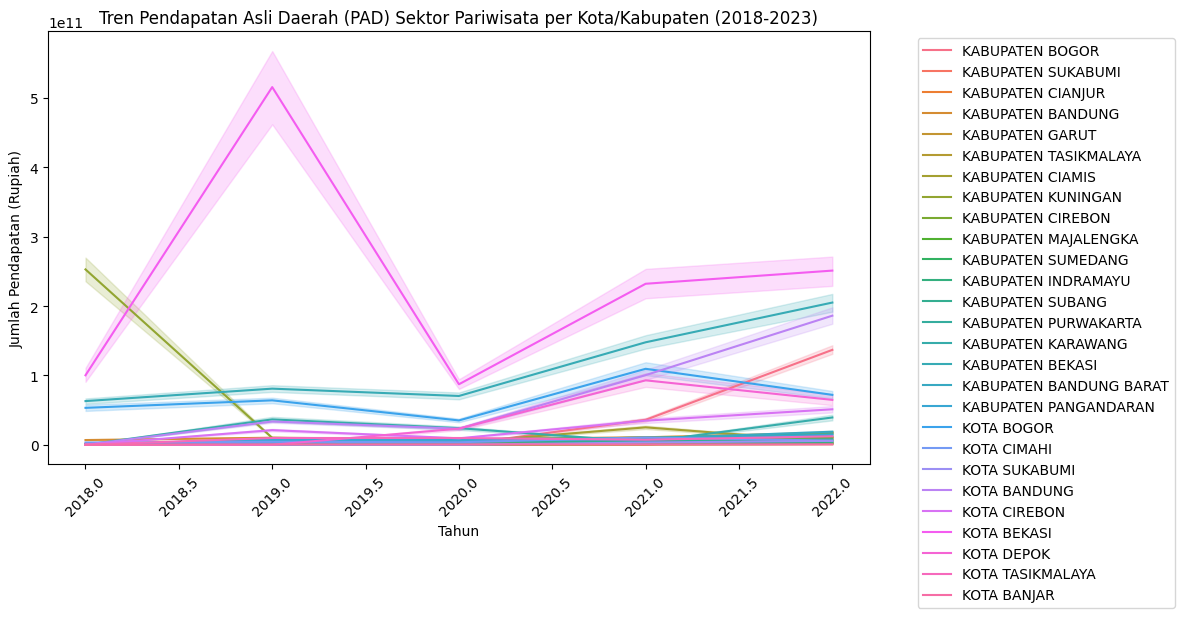

In [ ]:
# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Membuat line plot
sns.lineplot(x='tahun', y='jumlah_pendapatan', hue='nama_kabupaten_kota', data=df_merged)

# Menambahkan judul dan label
plt.title('Tren Pendapatan Asli Daerah (PAD) Sektor Pariwisata per Kota/Kabupaten (2018-2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pendapatan (Rupiah)')

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menempatkan legenda di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

## Analisis

1. Ketidakseimbangan Pendapatan Antar Wilayah:

  - Ada ketimpangan yang jelas antara beberapa kota besar seperti Kota Bekasi dan Bandung dengan kota-kota/kabupaten lain yang pendapatannya lebih kecil dan stabil. Misalnya, Kabupaten Garut dan Kabupaten Ciamis tampaknya memiliki pendapatan yang jauh lebih kecil dibandingkan kota-kota besar.

2. Puncak yang Signifikan pada 2018:

  - Kota Bekasi menunjukkan puncak PAD yang sangat tinggi pada tahun 2018, melebihi 5 triliun rupiah. Garisnya menurun tajam setelah itu pada tahun 2019, tetapi kembali meningkat secara stabil sejak 2020 hingga 2023, meskipun tidak mencapai puncak 2018.
  - Kota Bandung dan beberapa kota lain juga mengalami peningkatan signifikan di tahun 2018, tetapi puncaknya lebih rendah dibandingkan Kota Bekasi.
3. Penurunan di Tahun 2019:

  - Hampir semua wilayah mengalami penurunan pendapatan di tahun 2019. Ini mungkin terkait dengan adanya faktor ekonomi atau pariwisata pada periode tersebut, atau perubahan kebijakan lokal yang memengaruhi pendapatan sektor pariwisata.
4. Pemulihan Sejak 2020:

  - Setelah penurunan yang tajam pada tahun 2019, beberapa daerah mulai menunjukkan pemulihan pada tahun 2020 dan seterusnya, meskipun tidak semua daerah pulih dengan kecepatan yang sama.
  - Kota Bandung dan Kota Bekasi adalah dua contoh daerah yang menunjukkan pemulihan stabil sejak 2020 dan kembali mengalami kenaikan pada tahun 2022.

## Kesimpulan
**1. Bagaimana distribusi jumlah hotel dan pengunjung wisata antarwilayah di Jawa Barat?**

Kabupaten Bandung Barat dan beberapa wilayah seperti Kabupaten Karawang dan Kabupaten Purwakarta menunjukkan jumlah pengunjung wisata yang jauh lebih tinggi dibandingkan dengan fasilitas hotel yang tersedia. Hal ini menandakan bahwa beberapa daerah dengan tingkat kunjungan tinggi masih memiliki keterbatasan dalam fasilitas penginapan, yang dapat menghambat potensi pertumbuhan pariwisata.

**2. Apa tren utama jumlah pengunjung kawasan wisata dari tahun ke tahun?**

Terdapat puncak kunjungan wisata yang signifikan pada tahun 2018 di hampir semua wilayah, diikuti oleh penurunan tajam pada tahun 2019 hingga 2020, yang kemungkinan besar terkait dengan pandemi COVID-19. Tren pemulihan mulai terlihat pada tahun 2021 dan 2022, meskipun jumlah pengunjung belum sepenuhnya kembali ke angka sebelum pandemi.

**3. Bagaimana hubungan antara jumlah hotel dengan pendapatan pariwisata di berbagai kabupaten/kota?**

Tidak selalu terdapat korelasi langsung antara jumlah hotel dengan pendapatan pariwisata. Beberapa kabupaten, seperti Kabupaten Bandung dan Kabupaten Garut, mampu mencapai pendapatan tinggi meskipun jumlah hotel relatif sedikit. Ini menunjukkan bahwa faktor lain, seperti daya tarik wisata yang unik, juga memainkan peran penting dalam pendapatan pariwisata.

**4. Wilayah mana yang menunjukkan efisiensi dalam pendapatan pariwisata dengan fasilitas yang terbatas?**

Beberapa daerah dengan jumlah hotel yang rendah, seperti Kota Banjar dan Kota Sukabumi, mampu mempertahankan pendapatan yang cukup tinggi, yang menunjukkan efisiensi dalam memaksimalkan daya tarik pariwisata dengan fasilitas yang terbatas.

**5. Bagaimana ketimpangan pendapatan antarwilayah dalam sektor pariwisata?**

Terdapat ketimpangan pendapatan yang jelas, di mana kota-kota besar seperti Kota Bekasi dan Bandung menunjukkan pendapatan yang jauh lebih tinggi dibandingkan daerah lainnya. Kabupaten Garut dan Kabupaten Ciamis, misalnya, memiliki pendapatan yang lebih rendah dan cenderung stabil tanpa lonjakan signifikan.

**6. Bagaimana dampak peristiwa global (misalnya, pandemi COVID-19) terhadap jumlah pengunjung dan pendapatan?**

Pandemi COVID-19 memberikan dampak besar pada industri pariwisata, yang terlihat dari penurunan tajam pengunjung dan pendapatan pada 2019-2020. Namun, ada tanda-tanda pemulihan di beberapa wilayah, terutama kota-kota besar, yang mulai menunjukkan tren peningkatan pengunjung dan pendapatan setelah tahun 2020.

**7. Apakah terdapat rekomendasi untuk peningkatan fasilitas atau strategi wisata di wilayah tertentu?**

Berdasarkan analisis, wilayah dengan pengunjung tinggi namun fasilitas terbatas, seperti Kabupaten Bandung Barat, dapat mempertimbangkan pengembangan fasilitas penginapan dan wisata untuk meningkatkan daya tarik dan kenyamanan bagi wisatawan.

Secara keseluruhan, hasil analisis ini menunjukkan bahwa pariwisata di Jawa Barat memiliki potensi yang besar, namun memerlukan pengembangan yang lebih seimbang dan responsif terhadap kebutuhan fasilitas di daerah dengan kunjungan tinggi.